<a href="https://colab.research.google.com/github/cdsjatin/public/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

! pip install xlrd
%matplotlib inline
pd.set_option('display.max_rows', 10)

    100% |████████████████████████████████| 112kB 2.7MB/s 


In [439]:
from google.colab import drive
drive.mount('/content/gdrive')
filename = "./gdrive/My Drive/Colab Notebooks/assignment_sheet_jatin.xlsx"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Read

In [440]:
names = ['date','area','so2','no2','pm10']

# automatically parses datetime
df_raw = pd.read_excel(filename, names=names)
print(df_raw.dtypes)
df_raw.index.names = ['ids']
print('*'*20)
print(df_raw)

date    datetime64[ns]
area            object
so2            float64
no2            float64
pm10           float64
dtype: object
********************
           date        area   so2    no2   pm10
ids                                            
0    2015-06-16       Akola   6.0    6.0  102.0
1    2015-06-07       Akola   5.0    6.0  103.0
2    2015-06-22       Akola   6.0    5.0  103.0
3    2015-06-29       Akola   6.0    6.0  103.0
4    2015-09-21       Akola   6.0    7.0  104.0
...         ...         ...   ...    ...    ...
4731 2015-12-13  Ulhasnagar  43.0   99.0  178.0
4732 2015-12-16  Ulhasnagar  43.0  102.0  183.0
4733 2015-12-16  Ulhasnagar  43.0  105.0  188.0
4734 2015-09-12  Ulhasnagar  41.0   94.0  190.0
4735 2015-12-14  Ulhasnagar  42.0  106.0  190.0

[4736 rows x 5 columns]


In [441]:
# resample the datetime to quarter timeset
df = df_raw.copy()
df['quarter'] = df_raw['date'].dt.quarter
print(df.dtypes)
print(df.head())

date       datetime64[ns]
area               object
so2               float64
no2               float64
pm10              float64
quarter             int64
dtype: object
          date   area  so2  no2   pm10  quarter
ids                                            
0   2015-06-16  Akola  6.0  6.0  102.0        2
1   2015-06-07  Akola  5.0  6.0  103.0        2
2   2015-06-22  Akola  6.0  5.0  103.0        2
3   2015-06-29  Akola  6.0  6.0  103.0        2
4   2015-09-21  Akola  6.0  7.0  104.0        3


## EDA

In [442]:
# check if all the categorical points are of processed for names
print(df.area.unique())
print(df.area.value_counts())

['Akola' 'Amravati' 'Aurangabad' 'Chandrapur' 'Jalgaon' 'Jalna' 'Kolhapur'
 'Latur' 'Lote' 'Mumbai' 'Nagpur' 'Nanded' 'Nashik' 'Navi Mumbai' 'Pune'
 'Sangli' 'Solapur' 'Thane' 'Ulhasnagar']
Nagpur         632
Chandrapur     492
Nashik         470
Pune           436
Navi Mumbai    368
              ... 
Ulhasnagar     161
Solapur        103
Mumbai          96
Jalna           84
Lote            40
Name: area, Length: 19, dtype: int64


In [685]:
print("Null values count: ")
print(np.sum(df.isna(),axis=0))
print(df.shape)

Null values count: 
date         0
area         0
so2        206
no2         44
pm10        22
quarter      0
area_id      0
dtype: int64
(4736, 7)


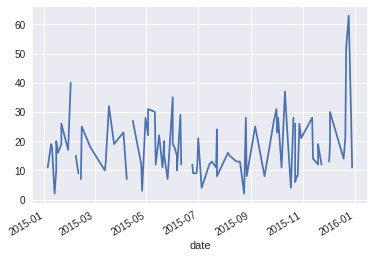

In [444]:
# change index to dates
df_date_indexed = df.set_index(['date'])

# plot dfset according to datetime

df_date_indexed.sample(100,random_state=42).so2.plot()

## we don't see any trend or periodicity
### confirm it through auto-correlation plots

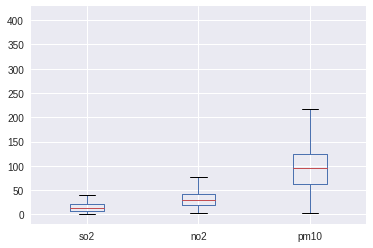

In [445]:
df_date_indexed.drop(['quarter'],axis=1).plot.box()
## we observe that there are no outlier and data is well spread across quartiles

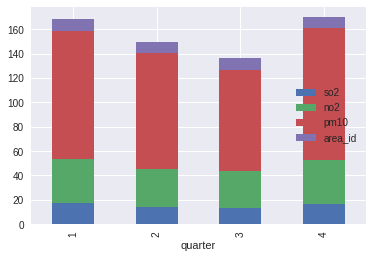

In [686]:
df.groupby(by='quarter').mean().plot.bar(stacked=True)

 we observed that for 3rd quarter the so2 and no2 values globally decreases
 and there is some linear relation between pm10 with so2 and no2

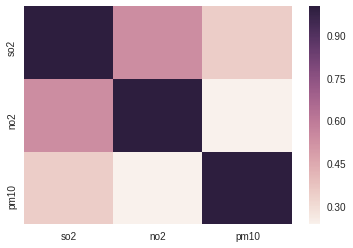

In [447]:
# to check the direct relation between so2 , no2 and pm10
corr = df.drop(['quarter'], axis=1).corr()
sns.heatmap(corr)

This shows that there is linear relation between so2 and no2 values, also s02 is more  correlated to target than no2



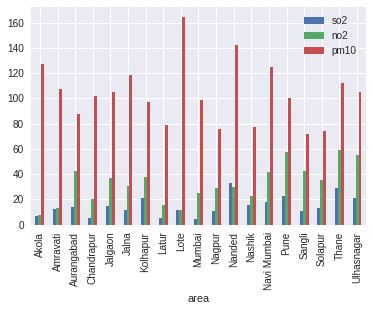

In [448]:
df.drop(['quarter'],axis=1).groupby(by=['area']).mean().plot.bar()

we observe that **Lote** has highest pm10 values and **Sangli** the minimum

area
Akola         AxesSubplot(0.125,0.2;0.775x0.68)
Amravati      AxesSubplot(0.125,0.2;0.775x0.68)
Aurangabad    AxesSubplot(0.125,0.2;0.775x0.68)
Chandrapur    AxesSubplot(0.125,0.2;0.775x0.68)
Jalgaon       AxesSubplot(0.125,0.2;0.775x0.68)
                            ...                
Pune          AxesSubplot(0.125,0.2;0.775x0.68)
Sangli        AxesSubplot(0.125,0.2;0.775x0.68)
Solapur       AxesSubplot(0.125,0.2;0.775x0.68)
Thane         AxesSubplot(0.125,0.2;0.775x0.68)
Ulhasnagar    AxesSubplot(0.125,0.2;0.775x0.68)
Length: 19, dtype: object


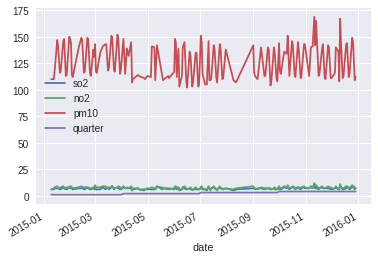

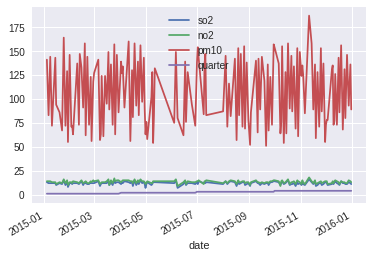

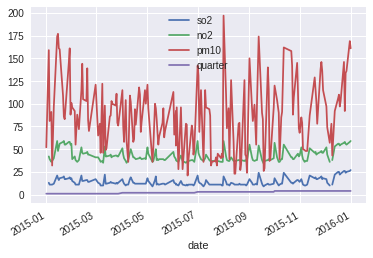

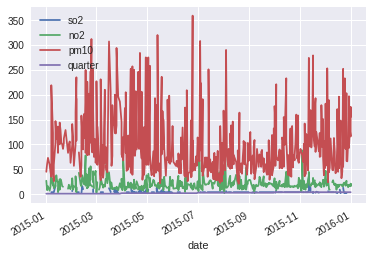

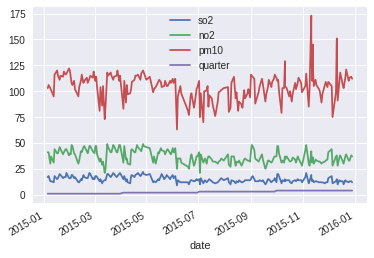

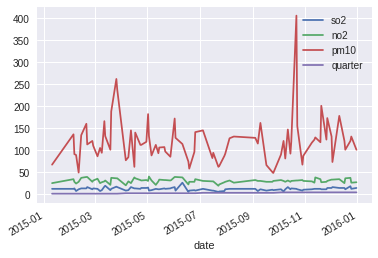

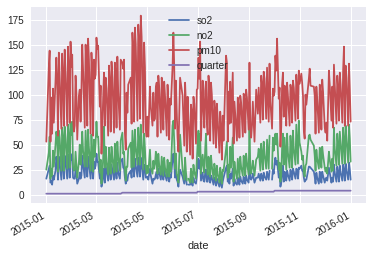

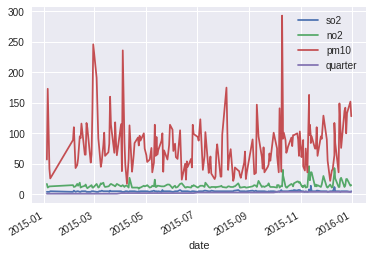

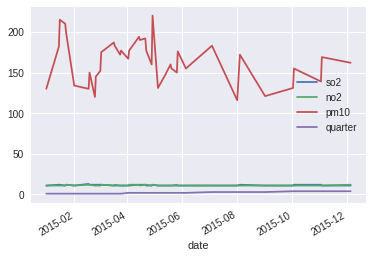

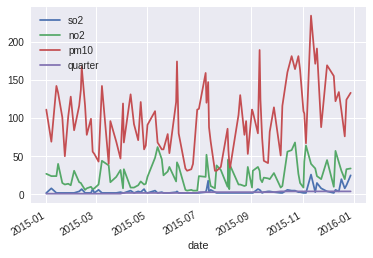

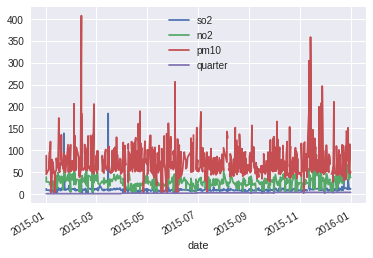

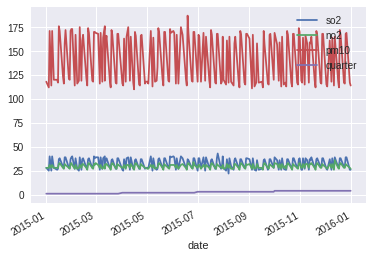

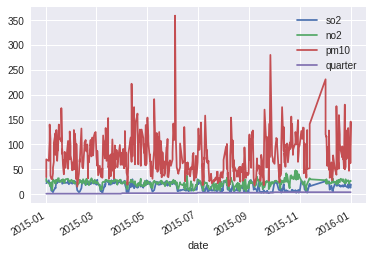

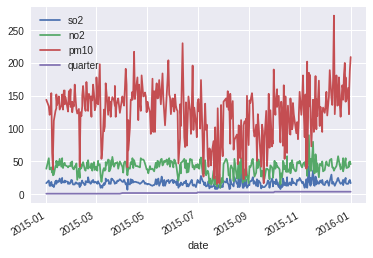

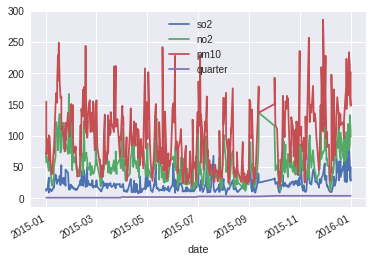

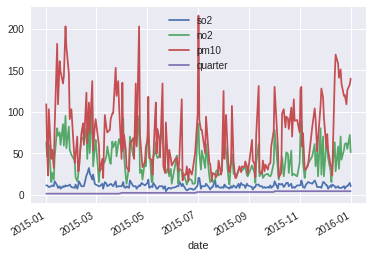

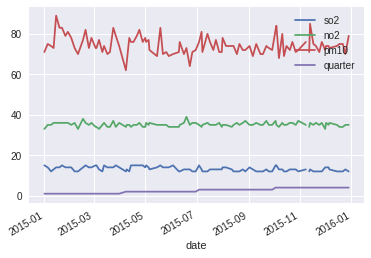

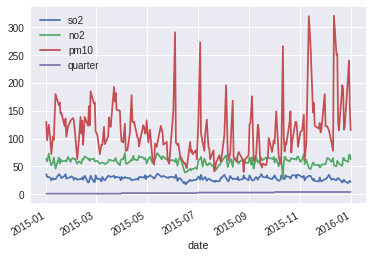

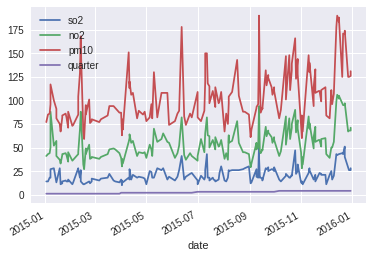

In [449]:
# visualize for each area the values of pm10
axs = df_date_indexed.groupby(['area']).plot()

print(axs)

we don't see any seasonality in months and observer that there is rise and fall in a week or month , so we will re-confirm that and try to utilise in further work



In [0]:
#[Further work] visualize seasonality in particular area according to week and month



## Imputation and Test and train Split

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [0]:
def score(pm_model, train_X, train_y, val_X, val_y):
    
  print('*'*5 + '{}'.format( pm_model.__class__ )+ '*'*5)
  
  y_pred_train = pm_model.predict(train_X)
  assert len(y_pred_train) == len(train_y) # length should be same
  mae = mean_absolute_error(y_pred_train, train_y)
  print("train mae: {:.3f}".format(mae))
  
  scores = cross_val_score(
  pm_model, train_X, train_y, cv=5, scoring='neg_mean_absolute_error')
  
  print("validation mae: {:.3f}".format(-scores.mean()))

  
# score(pm_model, train_X, train_y, val_X, val_y)

In [0]:
idx2str = {}
str2idx = {}

def get_ids(data):
  str2idx = {}
  idx = 0
  areas = data['area'].values
  for a in areas:
    if a not in str2idx:
      str2idx[a] = idx
      idx2str[idx] = a
      idx += 1
      
  return idx2str, str2idx

idx2str, str2idx = get_ids(df)

In [0]:
def preprocessingOneHot(df):
  
  df = df.dropna(axis=0).copy()
  
  df = pd.get_dummies(df)
  df = df.drop(['date'], axis=1)
#   print(df.columns)
#   print(df.shape)

  cols = ['so2','no2','quarter']
  
  return df[cols], df['pm10'], df
  
X_onehot, y_onehot, data_onehot = preprocessingOneHot(df)

# Onehot encodding make data sparse so linear models are expected to give better
# scores.

In [643]:
import sklearn as sk
print(sk.__version__)

0.19.2


In [645]:
print(df.columns)

cols = df.drop(['date','area'])

Index(['date', 'area', 'so2', 'no2', 'pm10', 'quarter'], dtype='object')


In [0]:
from sklearn.preprocessing.imputation import Imputer

def preprocessing(df):
  
  #df = df.dropna(axis=0).copy()
  df['area_id'] = [str2idx[a] for a in df['area']]
  df = df.drop(['date','area'], axis=1)
  
  cols = df.columns
  imp_mean = Imputer(missing_values=np.nan, strategy='mean')
  df_imp = imp_mean.fit_transform(df)
  df = pd.DataFrame(df_imp)
  df.columns = cols
  
#   df = np.asarray(df)
  cols = ['so2','no2','quarter','area_id']
  
  return df[cols], df['pm10'], df.copy()
  
X, y, data = preprocessing(df)

In [661]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size=0.0)
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape)

(4736, 4) (4736,) (0, 4) (0,)


### Decision Tree, KNN, SVM, XGBOOST





In [0]:
def all_regression(train_X, train_y, val_X, val_y):
  
  pm_model_knn = KNR(2,)
  pm_model_knn = pm_model_knn.fit(train_X, train_y)
  score(pm_model_knn, train_X, train_y, val_X, val_y)
  
  pm_model_linear = LinearRegression(normalize=False)
  pm_model_linear.fit(train_X, train_y)
  score(pm_model_linear, train_X, train_y, val_X, val_y)
  
  pm_model_dt = DecisionTreeRegressor(random_state=42, max_depth=10, max_leaf_nodes = 100)
  pm_model_dt.fit(train_X, train_y)
  score(pm_model_dt, train_X, train_y, val_X, val_y)
  
  pm_model_rf = RandomForestRegressor(random_state=42, max_depth=10, max_leaf_nodes = 100)
  pm_model_rf.fit(train_X, train_y)
  score(pm_model_rf, train_X, train_y, val_X, val_y)
    
  pm_model_svr = SVR(C=10)
  pm_model_svr = pm_model_svr.fit(train_X, train_y)
  score(pm_model_svr, train_X, train_y, val_X, val_y)
  
  pm_model_gbr = GradientBoostingRegressor(n_estimators=500)
  pm_model_gbr = pm_model_gbr.fit(train_X, train_y)
  score(pm_model_gbr, train_X, train_y, val_X, val_y)

In [663]:
all_regression(train_X, train_y, val_X, val_y)

*****<class 'sklearn.neighbors.regression.KNeighborsRegressor'>*****
train mae: 17.955
validation mae: 28.764
*****<class 'sklearn.linear_model.base.LinearRegression'>*****
train mae: 31.426
validation mae: 31.481
*****<class 'sklearn.tree.tree.DecisionTreeRegressor'>*****
train mae: 23.109
validation mae: 26.561
*****<class 'sklearn.ensemble.forest.RandomForestRegressor'>*****
train mae: 22.393
validation mae: 25.161
*****<class 'sklearn.svm.classes.SVR'>*****
train mae: 21.463
validation mae: 26.431
*****<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>*****
train mae: 22.159
validation mae: 24.885


In [664]:
pm_model_gbr = GradientBoostingRegressor(n_estimators= 500, max_depth= 5,
                                         min_samples_split= 3, learning_rate= 0.01)
pm_model_gbr = pm_model_gbr.fit(train_X, train_y)
score(pm_model_gbr, train_X, train_y, val_X, val_y)

*****<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>*****
train mae: 23.049
validation mae: 24.964


## Baseline taking average according to area and quarter

In [0]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)
def score2(pm_model, train_X, train_y, val_X, val_y):
    
  print('*'*5 + '{}'.format( pm_model.__class__ )+ '*'*5)
  
  y_pred_train = pm_model.predict(train_X)
  assert len(y_pred_train) == len(train_y) # length should be same
  mae = mean_absolute_error(y_pred_train, train_y)
  print("train mae: {:.3f}".format(mae))
  
  y_pred = pm_model.predict(val_X)
  
  assert len(val_y) == len(y_pred) # length should be same
  val_mae = mean_absolute_error(y_pred, val_y)
  print("validation mae: {:.3f}".format(val_mae))

# score(pm_model, train_X, train_y, val_X, val_y)

In [0]:
# we hypothesized that the target value depends upon the area than so2 values

class AreaQuarter():
  
  def __init__(self, data=data, idx2str = idx2str, str2idx = str2idx):
    self.data = data
    self.idx2str = idx2str
    self.str2idx = str2idx
  
  def fit(self, train_X, train_y):
        
    self.grouped = self.data.groupby(['area_id','quarter']).mean()
    
  def get_params():
    pass
    
  def predict(self, val_X):
    self.val_y = []
    for area_id, q in zip(val_X['area_id'], val_X['quarter']):
      expr = "quarter == {} and area_id == {}".format(q, area_id)
      self.val_y.append(self.grouped.query(expr)['pm10'].values[0])
    return self.val_y

In [672]:
model = AreaQuarter(data, idx2str, str2idx)
model.fit(train_X, train_y)
val_pred = model.predict(val_X)
score2(model, train_X, train_y, val_X, val_y)

*****<class '__main__.AreaQuarter'>*****
train mae: 29.265
validation mae: 28.160


In [0]:
# we hypothesized that the target value depends upon the area than so2 values

class AreaOnly():
  
  def __init__(self, data=data, idx2str = idx2str, str2idx = str2idx):
    self.data = data
    self.idx2str = idx2str
    self.str2idx = str2idx
  
  def fit(self, train_X, train_y):
        
    self.grouped = self.data.groupby(['area_id']).mean()
    
  def predict(self, val_X):
    self.val_y = []
    for area_id in zip(val_X['area_id']):
      expr = "area_id == {}".format(area_id)
      self.val_y.append(self.grouped.query(expr)['pm10'].values[0])
    return self.val_y

In [674]:
model = AreaOnly(data, idx2str, str2idx)
model.fit(train_X, train_y)
val_pred = model.predict(val_X)
score2(model, train_X, train_y, val_X, val_y)

*****<class '__main__.AreaOnly'>*****
train mae: 31.230
validation mae: 29.708


## Future Work

In [0]:
# we hypothesized that the target value depends upon the area and fitting linear
# functions to each area must give better result than looking data as a whole i.e. giving more
# priority to area similar results should be computed.

from sklearn.linear_model import BayesianRidge
class AreaLinear():
  
  def __init__(self, data=data, idx2str = idx2str, str2idx = str2idx):
    self.data = data
    self.idx2str = idx2str
    self.str2idx = str2idx
    
  def Linear(self, df):
    x = df['so2'].values.reshape(-1,1)
    y = df['pm10']
    model = LinearRegression()
    self.models.append(model.fit(x, y))
  
  def fit(self, train_X, train_y):
    self.models = []
    data.groupby(['area_id']).apply(lambda x: self.Linear(x))

  def predict(self, val_X):
    predictions = []
#     print(val_X.shape[0])
    for i in range(val_X.shape[0]):
      predictions.append( models[int(val_X.iloc[i]['area_id'])].predict(val_X.iloc[i]['so2'])[0] )
    
    return predictions

In [688]:
model = AreaLinear(data, idx2str, str2idx)
model.fit(train_X, train_y)
val_pred = model.predict(val_X)

score2(model, train_X, train_y, val_X, val_y)

*****<class '__main__.AreaLinear'>*****
train mae: 47.764
validation mae: 44.112


## Conclusion

Below are summarisations:

1. Preprocessing like mean imputation, onehot encoddings,  didn't improve scores much.
3. simple baseline model also gives good accuracy but since have used all datapoints in training so validation is not good measure.
1.   **Gradient Boosting Regression** gives best performance and least mean absolute error on validation data.
3. k-fold cross validation gives better model score on small dataset.
2.   \[so2, no2, area, quarter\]  are just small number  of  features so new features can be made from their linear or non linear combinations (future work).




